In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [161]:
# Se carga el dataset desde la ruta de drive
rt_movies = pd.read_csv('/content/drive/MyDrive/Proyecto IA/rotten_tomatoes_movies.csv')

# Se verifica si se cargo correctamente
rt_movies.head(5)


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [162]:
# Se verifica las dimensiones del dataset
rt_movies.shape

(17712, 22)

In [164]:
# Se observa el tipo de datos de cada columna del dataset
rt_movies.dtypes

rotten_tomatoes_link                 object
movie_title                          object
movie_info                           object
critics_consensus                    object
content_rating                       object
genres                               object
directors                            object
authors                              object
actors                               object
original_release_date                object
streaming_release_date               object
runtime                             float64
production_company                   object
tomatometer_status                   object
tomatometer_rating                  float64
tomatometer_count                   float64
audience_status                      object
audience_rating                     float64
audience_count                      float64
tomatometer_top_critics_count         int64
tomatometer_fresh_critics_count       int64
tomatometer_rotten_critics_count      int64
dtype: object

In [165]:
# Se observa la cantidad de valores no asignados (nan) por columna
rt_movies.isna().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8578
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

In [168]:
# Define un diccionario de correspondencia entre valores y números
correspondencia1 = {
    "Certified-Fresh": 3,
    "Fresh": 2,
    "Rotten": 1
}

correspondencia2 = {
    "Upright": 1,
    "Spilled": 0,
}

# Utiliza la función map() para asignar los valores numéricos
rt_movies['tomatometer_status'] = rt_movies['tomatometer_status'].map(correspondencia1)
rt_movies['audience_status'] = rt_movies['audience_status'].map(correspondencia2)

# Se verifica que el mapeo se realizo correctamente
rt_movies['audience_status'].head(3)


0    0.0
1    1.0
2    0.0
Name: audience_status, dtype: float64

In [169]:
rt_movies['original_release_date'] = pd.to_datetime(rt_movies['original_release_date'])  # Convertir la columna "original_release_date" al formato de fecha

# Extraer los años y asignarlos a una nueva columna llamada "release_year"
rt_movies['release_year'] = rt_movies['original_release_date'].dt.year

# Se verifica los cambios en el data set
rt_movies.head(5)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,release_year
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,1.0,49.0,149.0,0.0,53.0,254421.0,43,73,76,2010.0
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,3.0,87.0,142.0,1.0,64.0,11574.0,44,123,19,2010.0
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,2.0,67.0,24.0,0.0,53.0,14684.0,2,16,8,1979.0
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,3.0,100.0,54.0,1.0,97.0,105386.0,6,54,0,1957.0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,2.0,89.0,27.0,1.0,74.0,68918.0,5,24,3,1954.0


100%|██████████| 10/10 [00:40<00:00,  4.07s/it]


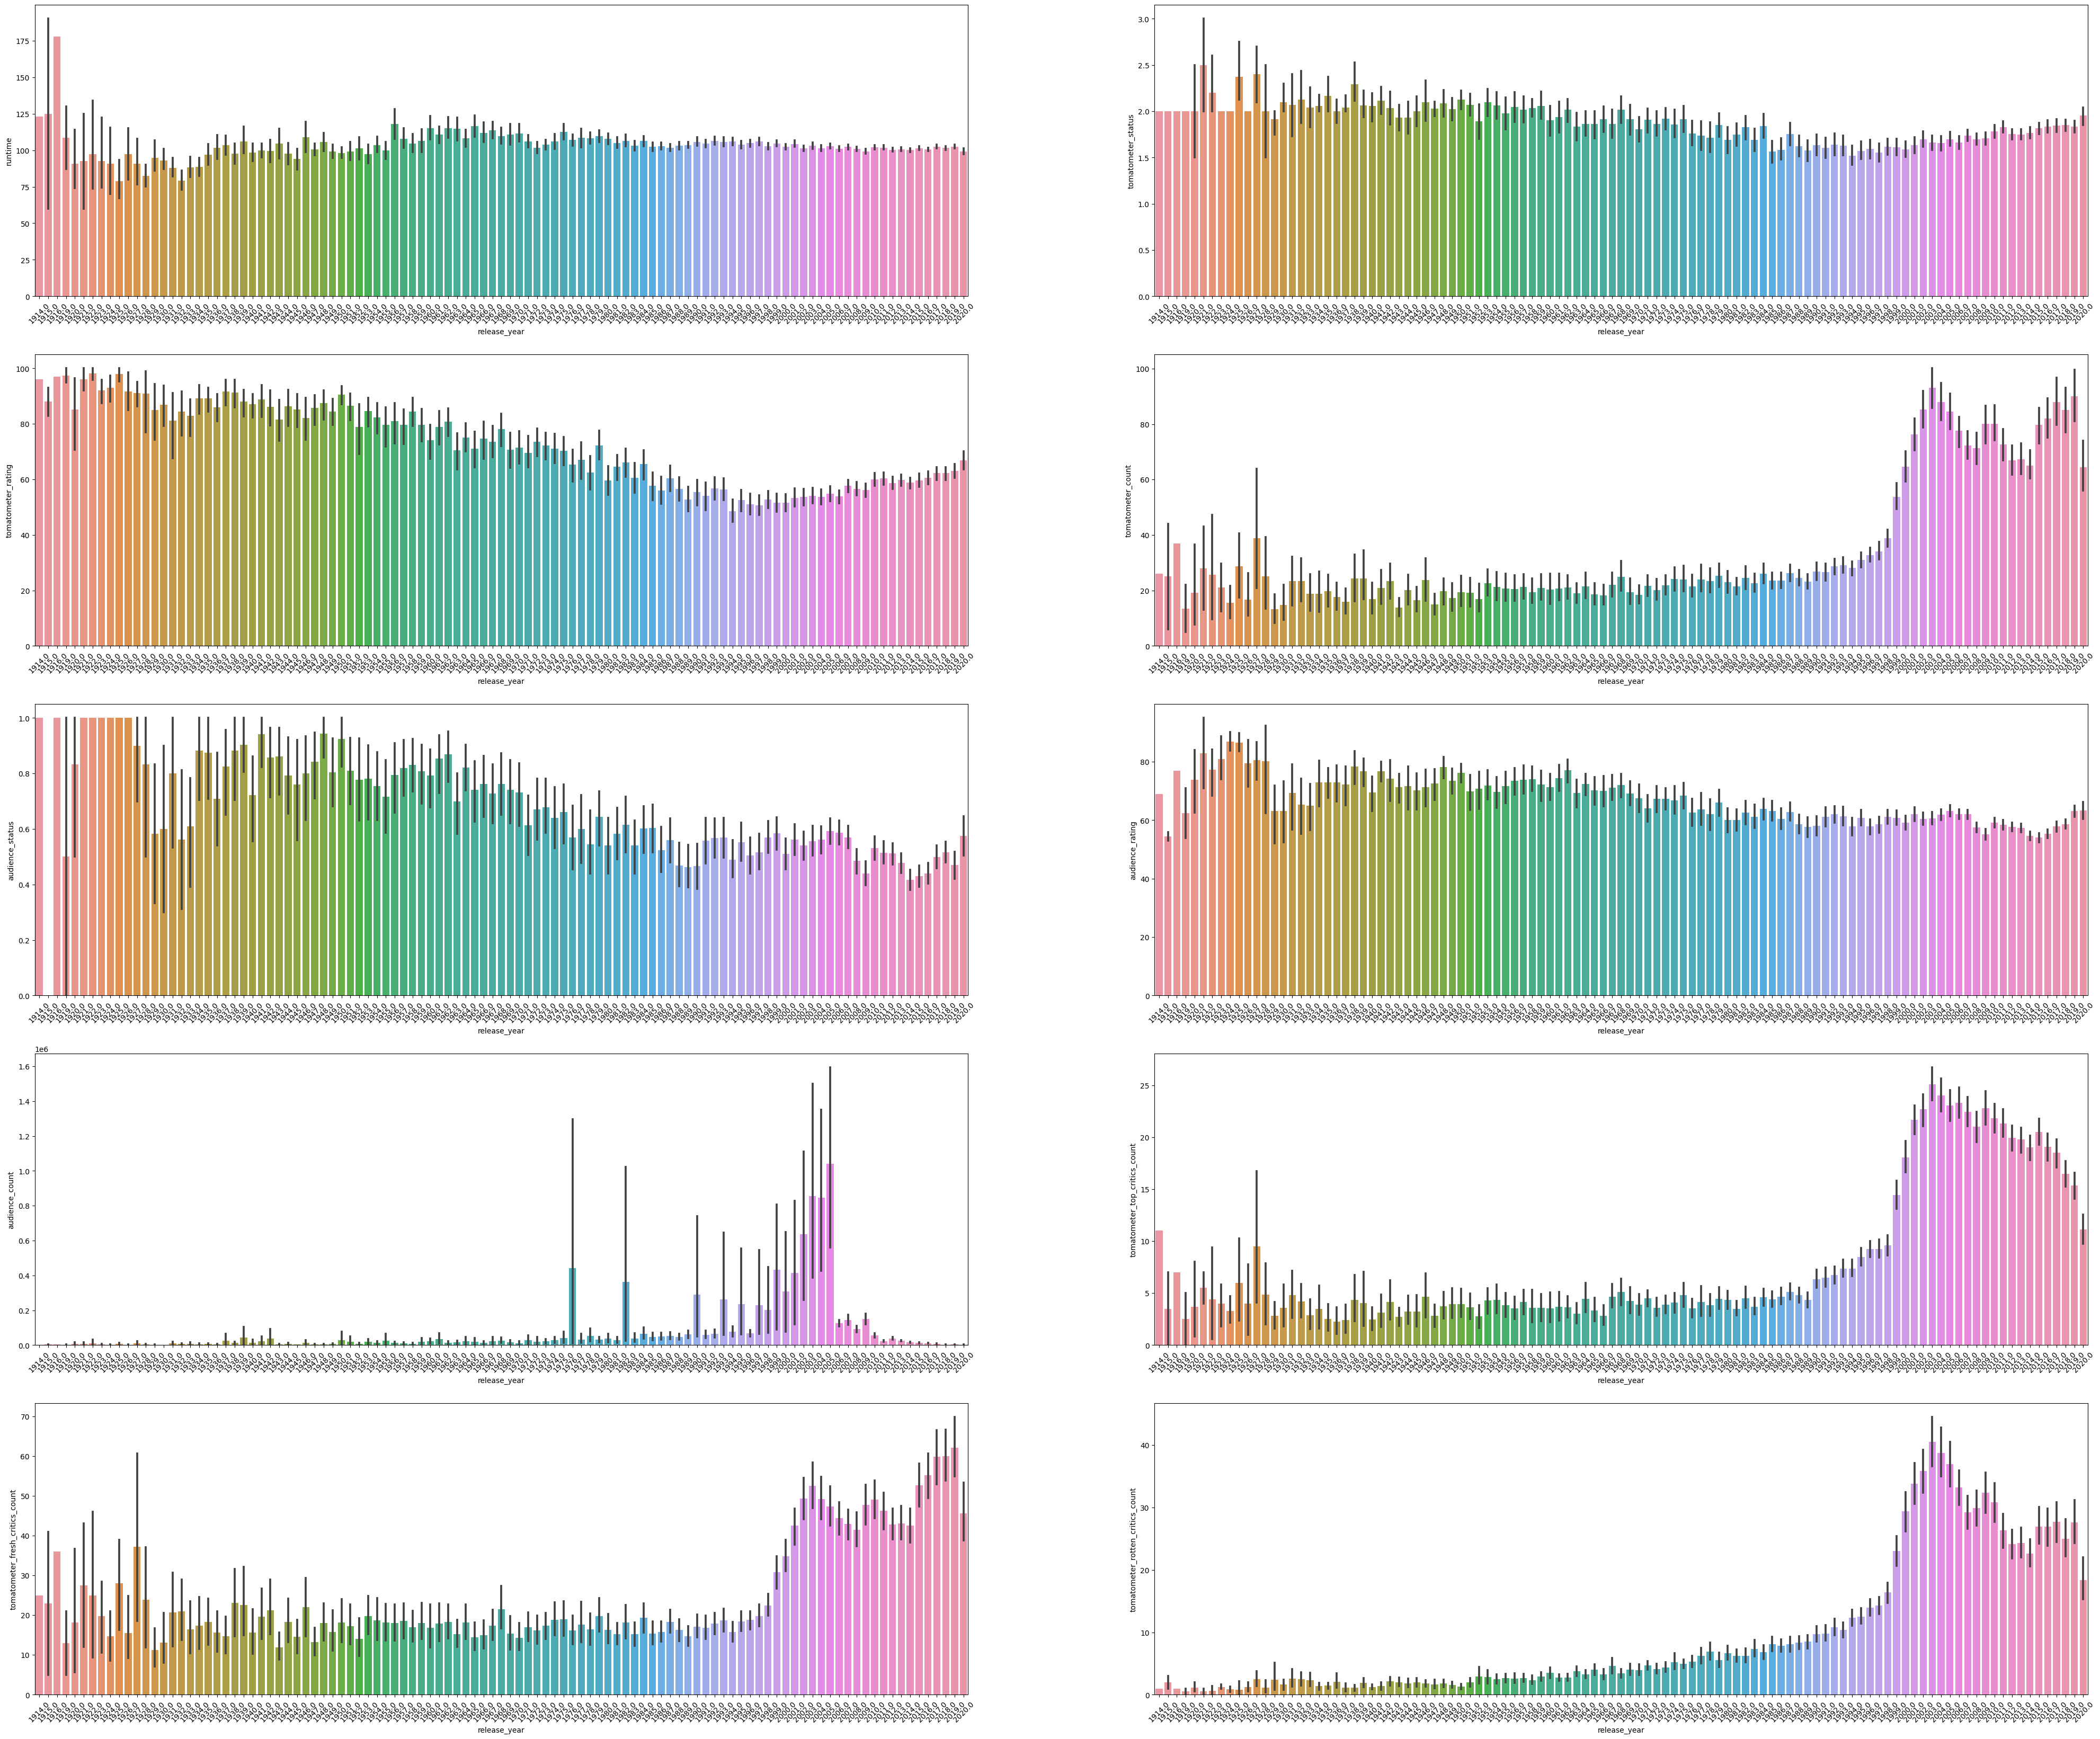

In [171]:
# Se crea un subdataframe con unicamente columna que tengas datos numericos
viz_data1 = rt_movies.drop(columns=['rotten_tomatoes_link', 'original_release_date', 'release_year', 'movie_info', 'critics_consensus',
                                   'content_rating','genres','directors','authors','actors','original_release_date','streaming_release_date',
                                   'production_company'])

# Se grafican los datos en función del tiempo
plt.figure(figsize=(50, 50))
for i in tqdm(np.arange(1, len(viz_data1.columns))):
    plt.subplot(6, 2, i)
    sns.barplot(x=rt_movies.release_year,y=viz_data1[viz_data1.columns[i]])
    plt.xticks(rotation=45);
plt.show()

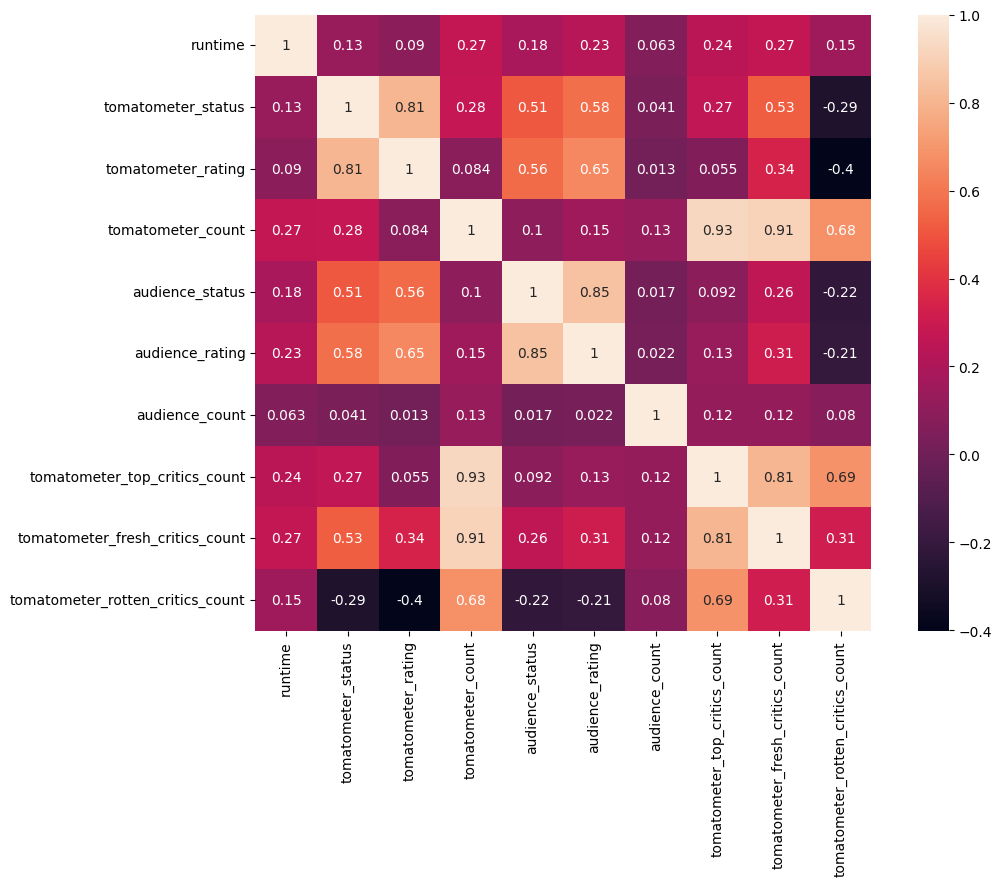

In [211]:
# Se crea un mapa de calor con la correlación de Pearson
plt.subplots(figsize=(12, 8))
sns.heatmap(viz_data1.corr(), annot=True, square=True)
plt.show()

In [174]:
# Se define una función para normalizar valores entre 0 y 1

def normalize_column(col):
    max_d = rt_movies[col].max()
    min_d = rt_movies[col].min()
    rt_movies[col] = (rt_movies[col] - min_d)/(max_d - min_d)

In [175]:
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] #Se crea una lista que contiene formatos numericos
num = rt_movies.select_dtypes(include=num_types) # Se crea un subdataset que contenga solamente datos numericos


for col in num.columns:
  media = num[col].mean()  # Calcula la media de la columna actual
  rt_movies[col].fillna(media, inplace=True) # Reemplaza NaN con la media en la columna actual en el dataset
  num[col].fillna(media, inplace=True)  # Reemplaza NaN con la media en la columna actual en el subdataset
  normalize_column(col) # Normaliza los valores de cada columna

In [176]:
# Se verifican si hay valores no asignados en el subdataset
num.isna().sum()

runtime                             0
tomatometer_status                  0
tomatometer_rating                  0
tomatometer_count                   0
audience_status                     0
audience_rating                     0
audience_count                      0
tomatometer_top_critics_count       0
tomatometer_fresh_critics_count     0
tomatometer_rotten_critics_count    0
release_year                        0
dtype: int64

In [177]:
# Se imprimes las primeras 3 filas para observar los cambios en el dataset
rt_movies.head(3)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,release_year
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,0.0,0.49,0.253076,0.0,0.53,0.007107,0.623188,0.146881,0.250825,0.905660
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,1.0,0.87,0.240773,1.0,0.64,0.000323,0.637681,0.247485,0.062706,0.905660
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,0.5,0.67,0.033392,0.0,0.53,0.000410,0.028986,0.032193,0.026403,0.613208


In [178]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10) # Se definen el número de clusters
cat = km.fit_predict(num) # Se almacenan las etiquetas de clusters
rt_movies['cat'] = cat # Agrega la columna cat al dataset con los valores de cat
normalize_column('cat') # Normaliza los datos de la columna cat

In [179]:
# Se verifica la nueva columna cat en el dataset
rt_movies.cat[:10]

0    0.444444
1    0.000000
2    0.000000
3    1.000000
4    1.000000
5    0.222222
6    0.000000
7    0.000000
8    0.000000
9    0.000000
Name: cat, dtype: float64

In [212]:
class MovieRecommender():
    def __init__(self, rec_data):
        # Se especifican los datos a trabajar
        self.rec_data_ = rec_data

    # Cambiar los datos a trabajar
    def change_data(self, rec_data):
        self.rec_data_ = rec_data

    # Función para obtener las recomendaciones
    def get_recommendations(self, movie_name, amount=1):
        distances = [] # Se iniciliza una lista de distancia vacia

        # Selecciona los datos de la pelicula de referencia
        movie = self.rec_data_[(self.rec_data_.movie_title.str.lower() == movie_name.lower())].head(1).values[0]

        # Se excluye la pelicula de referencia en un nuevo dataset
        res_data = self.rec_data_[self.rec_data_.movie_title.str.lower() != movie_name.lower()]
        for r_movie in tqdm(res_data.values):
            dist = 0 # Se inicializa la variable distancia en 0
            for col in np.arange(len(res_data.columns)):
                # Inidices de las columnas no numericas
                if not col in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12,]:
                    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(movie[col]) - float(r_movie[col]))
            distances.append(dist)

        # Se crea una columna distances en el subdataset
        res_data['distance'] = distances

        # Ordena el subdataset de manera ascendete en función de la distancia
        res_data = res_data.sort_values('distance')
        columns = ['movie_title','genres','actors','production_company'] # Se indican las columas de interes
        return res_data[columns][:amount] # Retorna el subdataset con las columnas de interes y la cantidad de recomendcaciones

In [215]:
recommender = MovieRecommender(rt_movies)

In [216]:
recommender.get_recommendations("get out",10)

100%|██████████| 17711/17711 [00:00<00:00, 22613.07it/s]


,movie_title,genres,actors,production_company
8390,Inside Out,"Animation, Kids & Family","Amy Poehler, Phyllis Smith, Richard Kind, Bill...",Disney/Pixar
9913,Mad Max: Fury Road,"Action & Adventure, Science Fiction & Fantasy","Tom Hardy, Charlize Theron, Nicholas Hoult, Ro...",Warner Bros.
13723,Spotlight,"Drama, Mystery & Suspense","Mark Ruffalo, Michael Keaton, Rachel McAdams, ...",Open Road Films
2918,Arrival,"Drama, Mystery & Suspense, Science Fiction & F...","Amy Adams, Jeremy Renner, Forest Whitaker, Mic...",21 Laps Entertainment
1868,12 Years a Slave,Drama,"Chiwetel Ejiofor, Michael Fassbender, Benedict...",Fox Searchlight
3063,Baby Driver,"Action & Adventure, Drama","Ansel Elgort, Kevin Spacey, Lily James, Jon Be...",Sony Pictures
9641,Logan,"Action & Adventure, Drama, Science Fiction & F...","Hugh Jackman, Patrick Stewart, Boyd Holbrook, ...",20th Century Fox
14528,The Artist,"Comedy, Drama, Romance","Jean Dujardin, Bérénice Bejo, John Goodman, Ja...",The Weinstein Company
5822,Dunkirk,"Action & Adventure, Drama","Fionn Whitehead, Tom Glynn-Carney, Jack Lowden...",Warner Bros. Pictures
13691,Spider-Man: Homecoming,"Action & Adventure, Drama, Science Fiction & F...","Tom Holland (II), Michael Keaton, Robert Downe...",Sony Pictures


In [187]:
import itertools


class Sentence():

    def evaluate(self, model):
        """Evaluates the logical sentence."""
        raise Exception("nothing to evaluate")

    def formula(self):
        """Returns string formula representing logical sentence."""
        return ""

    def symbols(self):
        """Returns a set of all symbols in the logical sentence."""
        return set()

    @classmethod
    def validate(cls, sentence):
        if not isinstance(sentence, Sentence):
            raise TypeError("must be a logical sentence")

    @classmethod
    def parenthesize(cls, s):
        """Parenthesizes an expression if not already parenthesized."""
        def balanced(s):
            """Checks if a string has balanced parentheses."""
            count = 0
            for c in s:
                if c == "(":
                    count += 1
                elif c == ")":
                    if count <= 0:
                        return False
                    count -= 1
            return count == 0
        if not len(s) or s.isalpha() or (
            s[0] == "(" and s[-1] == ")" and balanced(s[1:-1])
        ):
            return s
        else:
            return f"({s})"


class Symbol(Sentence):

    def __init__(self, name):
        self.name = name

    def __eq__(self, other):
        return isinstance(other, Symbol) and self.name == other.name

    def __hash__(self):
        return hash(("symbol", self.name))

    def __repr__(self):
        return self.name

    def evaluate(self, model):
        try:
            return bool(model[self.name])
        except KeyError:
            raise EvaluationException(f"variable {self.name} not in model")

    def formula(self):
        return self.name

    def symbols(self):
        return {self.name}


class Not(Sentence):
    def __init__(self, operand):
        Sentence.validate(operand)
        self.operand = operand

    def __eq__(self, other):
        return isinstance(other, Not) and self.operand == other.operand

    def __hash__(self):
        return hash(("not", hash(self.operand)))

    def __repr__(self):
        return f"Not({self.operand})"

    def evaluate(self, model):
        return not self.operand.evaluate(model)

    def formula(self):
        return "¬" + Sentence.parenthesize(self.operand.formula())

    def symbols(self):
        return self.operand.symbols()


class And(Sentence):
    def __init__(self, *conjuncts):
        for conjunct in conjuncts:
            Sentence.validate(conjunct)
        self.conjuncts = list(conjuncts)

    def __eq__(self, other):
        return isinstance(other, And) and self.conjuncts == other.conjuncts

    def __hash__(self):
        return hash(
            ("and", tuple(hash(conjunct) for conjunct in self.conjuncts))
        )

    def __repr__(self):
        conjunctions = ", ".join(
            [str(conjunct) for conjunct in self.conjuncts]
        )
        return f"And({conjunctions})"

    def add(self, conjunct):
        Sentence.validate(conjunct)
        self.conjuncts.append(conjunct)

    def evaluate(self, model):
        return all(conjunct.evaluate(model) for conjunct in self.conjuncts)

    def formula(self):
        if len(self.conjuncts) == 1:
            return self.conjuncts[0].formula()
        return " ∧ ".join([Sentence.parenthesize(conjunct.formula())
                           for conjunct in self.conjuncts])

    def symbols(self):
        return set.union(*[conjunct.symbols() for conjunct in self.conjuncts])


class Or(Sentence):
    def __init__(self, *disjuncts):
        for disjunct in disjuncts:
            Sentence.validate(disjunct)
        self.disjuncts = list(disjuncts)

    def __eq__(self, other):
        return isinstance(other, Or) and self.disjuncts == other.disjuncts

    def __hash__(self):
        return hash(
            ("or", tuple(hash(disjunct) for disjunct in self.disjuncts))
        )

    def __repr__(self):
        disjuncts = ", ".join([str(disjunct) for disjunct in self.disjuncts])
        return f"Or({disjuncts})"

    def evaluate(self, model):
        return any(disjunct.evaluate(model) for disjunct in self.disjuncts)

    def formula(self):
        if len(self.disjuncts) == 1:
            return self.disjuncts[0].formula()
        return " ∨  ".join([Sentence.parenthesize(disjunct.formula())
                            for disjunct in self.disjuncts])

    def symbols(self):
        return set.union(*[disjunct.symbols() for disjunct in self.disjuncts])


class Implication(Sentence):
    def __init__(self, antecedent, consequent):
        Sentence.validate(antecedent)
        Sentence.validate(consequent)
        self.antecedent = antecedent
        self.consequent = consequent

    def __eq__(self, other):
        return (isinstance(other, Implication)
                and self.antecedent == other.antecedent
                and self.consequent == other.consequent)

    def __hash__(self):
        return hash(("implies", hash(self.antecedent), hash(self.consequent)))

    def __repr__(self):
        return f"Implication({self.antecedent}, {self.consequent})"

    def evaluate(self, model):
        return ((not self.antecedent.evaluate(model))
                or self.consequent.evaluate(model))

    def formula(self):
        antecedent = Sentence.parenthesize(self.antecedent.formula())
        consequent = Sentence.parenthesize(self.consequent.formula())
        return f"{antecedent} => {consequent}"

    def symbols(self):
        return set.union(self.antecedent.symbols(), self.consequent.symbols())


class Biconditional(Sentence):
    def __init__(self, left, right):
        Sentence.validate(left)
        Sentence.validate(right)
        self.left = left
        self.right = right

    def __eq__(self, other):
        return (isinstance(other, Biconditional)
                and self.left == other.left
                and self.right == other.right)

    def __hash__(self):
        return hash(("biconditional", hash(self.left), hash(self.right)))

    def __repr__(self):
        return f"Biconditional({self.left}, {self.right})"

    def evaluate(self, model):
        return ((self.left.evaluate(model)
                 and self.right.evaluate(model))
                or (not self.left.evaluate(model)
                    and not self.right.evaluate(model)))

    def formula(self):
        left = Sentence.parenthesize(str(self.left))
        right = Sentence.parenthesize(str(self.right))
        return f"{left} <=> {right}"

    def symbols(self):
        return set.union(self.left.symbols(), self.right.symbols())


def model_check(knowledge, query):
    """Checks if knowledge base entails query."""

    def check_all(knowledge, query, symbols, model):
        """Checks if knowledge base entails query, given a particular model."""

        # If model has an assignment for each symbol
        if not symbols:

            # If knowledge base is true in model, then query must also be true
            if knowledge.evaluate(model):
                return query.evaluate(model)
            return True
        else:

            # Choose one of the remaining unused symbols
            remaining = symbols.copy()
            p = remaining.pop()

            # Create a model where the symbol is true
            model_true = model.copy()
            model_true[p] = True

            # Create a model where the symbol is false
            model_false = model.copy()
            model_false[p] = False

            # Ensure entailment holds in both models
            return (check_all(knowledge, query, remaining, model_true) and
                    check_all(knowledge, query, remaining, model_false))

    # Get all symbols in both knowledge and query
    symbols = set.union(knowledge.symbols(), query.symbols())

    # Check that knowledge entails query
    return check_all(knowledge, query, symbols, dict())


In [188]:
rt_movies.dtypes

rotten_tomatoes_link                        object
movie_title                                 object
movie_info                                  object
critics_consensus                           object
content_rating                              object
genres                                      object
directors                                   object
authors                                     object
actors                                      object
original_release_date               datetime64[ns]
streaming_release_date                      object
runtime                                    float64
production_company                          object
tomatometer_status                         float64
tomatometer_rating                         float64
tomatometer_count                          float64
audience_status                            float64
audience_rating                            float64
audience_count                             float64
tomatometer_top_critics_count  

In [219]:
def recomendar(reference_movie_title, num_recommendations, dataset):
    # Crear una instancia de MovieRecommender con el dataset proporcionado
    recommender = MovieRecommender(dataset)

    # Obtener las recomendaciones basadas en la película de referencia y la cantidad deseada
    recommendations = recommender.get_recommendations(reference_movie_title, num_recommendations)



    # Obtener los géneros, actores y productoras de la película de referencia
    reference_movie = rt_movies[rt_movies['movie_title'].str.lower() == reference_movie_title.lower()].iloc[0]
    reference_genres = reference_movie['genres'].split(', ')
    reference_actors = [actor.strip() for actor in reference_movie['actors'].split(', ')]
    reference_production_companies = [company.strip() for company in reference_movie['production_company'].split('/')]

    #reference_knowledge = And(*[Symbol(genre) for genre in reference_genres])

    # Crear condiciones lógicas para géneros, actores y productoras
    genre_conditions = And(*[Symbol(genre) for genre in reference_genres])
    actor_conditions = And(*[Symbol(actor) for actor in reference_actors])
    production_conditions = And(*[Symbol(company) for company in reference_production_companies])

    print(Sentence.formula(genre_conditions))

    # Filtrar las recomendaciones
    filtered_recommendations = []

    #print(len(actor_conditions))

    for _, row in recommendations.iterrows():
      genre_match = []
      actors_match = []
      company_match = []

      # Obtener los géneros, actores y productoras de la película recomendada
      movie_genres = np.array(recommendations['genres'])[0].split(', ')
      movie_actors = np.array(recommendations['actors'])[0].split(', ')
      movie_production_companies = np.array(recommendations['production_company'])[0].split('/')

      #print(movie_genres)

      genre_reco = [Symbol(genre) for genre in movie_genres]
      actor_reco= [Symbol(genre) for genre in movie_actors]
      production_reco = [Symbol(genre) for genre in movie_production_companies]

      for condition in genre_reco:
        genre_match.append(str(model_check(genre_conditions, condition)))
      for condition in actor_reco:
        actors_match.append(str(model_check(genre_conditions, condition)))
      for condition in production_reco:
        company_match.append(str(model_check(genre_conditions, condition)))

      if str(True) in genre_match or str(True) in actors_match or str(True) in company_match:
        filtered_recommendations.append(row)

    # Convertir las recomendaciones filtradas en un DataFrame
    filtered_df = pd.DataFrame(filtered_recommendations, columns=recommendations.columns)

    return filtered_df

In [220]:
recomendar('shrek',10,rt_movies)

100%|██████████| 17711/17711 [00:00<00:00, 18833.61it/s]

,movie_title,genres,actors,production_company
10563,"Monsters, Inc.","Animation, Comedy, Kids & Family, Science Fict...","John Goodman, Billy Crystal, Mary Gibbs, Steve...",Disney/Pixar
3889,Borat: Cultural Learnings of America for Make ...,Comedy,"Sacha Baron Cohen, Ken Davitian, Luenell, Spir...",20th Century Fox
13181,Shaun of the Dead,"Action & Adventure, Comedy, Horror, Science Fi...","Simon Pegg, Kate Ashfield, Nick Frost, Lucy Da...",Focus Features
10881,Mystic River,"Drama, Mystery & Suspense","Sean Penn, Tim Robbins, Kevin Bacon, Laurence ...",WB
9043,"Kiss Kiss, Bang Bang","Comedy, Drama, Romance","Robert Downey Jr., Val Kilmer, Michelle Monagh...",Warner Bros. Pictures
8112,"I Love You, Man","Comedy, Drama","Paul Rudd, Jason Segel, Rashida Jones, Andy Sa...",Dreamworks/Paramount
9590,Little Miss Sunshine,Comedy,"Greg Kinnear, Toni Collette, Steve Carell, Pau...",Fox Searchlight
9121,Kung Fu Hustle,"Action & Adventure, Art House & International,...","Stephen Chow, Wah Yuen, Shengyi Huang, Kwok-Kw...",Sony Pictures Classics
14137,Sweeney Todd: The Demon Barber of Fleet Street,"Drama, Musical & Performing Arts, Mystery & Su...","Johnny Depp, Helena Bonham Carter, Alan Rickma...",DreamWorks/Paramount Studios
15742,The Royal Tenenbaums,Comedy,"Gene Hackman, Anjelica Huston, Gwyneth Paltrow...",Buena Vista Distribution Compa


In [221]:
def recomendar1(reference_movie_title, num_recommendations, dataset):

    # Verificar si la película de referencia está en el dataset
    reference_movie_lower = reference_movie_title.lower()
    if reference_movie_lower not in dataset['movie_title'].str.lower().values:
        return "La película de referencia no se encuentra en el dataset o está mal escrita."

    # Crear una instancia de MovieRecommender con el dataset proporcionado
    recommender = mr1(dataset)

    # Obtener las recomendaciones basadas en la película de referencia y la cantidad deseada
    recommendations = recommender.get_recommendations(reference_movie_title, num_recommendations)

    # Obtener los géneros, actores y productoras de la película de referencia
    reference_movie = rt_movies[rt_movies['movie_title'].str.lower() == reference_movie_title.lower()].iloc[0]
    reference_genres = reference_movie['genres'].split(', ')
    reference_actors = [actor.strip() for actor in reference_movie['actors'].split(', ')]
    reference_production_companies = [company.strip() for company in reference_movie['production_company'].split('/')]

    #reference_knowledge = And(*[Symbol(genre) for genre in reference_genres])

    # Crear condiciones lógicas para géneros, actores y productoras
    genre_conditions = And(*[Symbol(genre) for genre in reference_genres])
    actor_conditions = And(*[Symbol(actor) for actor in reference_actors])
    production_conditions = And(*[Symbol(company) for company in reference_production_companies])

    print(Sentence.formula(genre_conditions))

    # Filtrar las recomendaciones
    filtered_recommendations = []

    for _, row in recommendations.iterrows():
        genre_match = []
        actors_match = []
        company_match = []

        # Obtener los géneros, actores y productoras de la película recomendada
        movie_genres = np.array(recommendations['genres'])[0].split(', ')
        movie_actors = np.array(recommendations['actors'])[0].split(', ')
        movie_production_companies = np.array(recommendations['production_company'])[0].split('/')


        genre_reco = [Symbol(genre) for genre in movie_genres]
        actor_reco= [Symbol(genre) for genre in movie_actors]
        production_reco = [Symbol(genre) for genre in movie_production_companies]


        for condition in genre_reco:
          genre_match.append(str(model_check(genre_conditions, condition)))
        for condition in actor_reco:
          actors_match.append(str(model_check(actor_conditions, condition)))
        for condition in production_reco:
          company_match.append(str(model_check(production_conditions, condition)))


        if str(True) in genre_match or str(True) in actors_match or str(True) in company_match:
          filtered_recommendations.append(row)

    # Convertir las recomendaciones filtradas en un DataFrame
    filtered_df = pd.DataFrame(filtered_recommendations, columns=recommendations.columns)

    return filtered_df


In [222]:
recomendar1('shrek', 3, rt_movies)

100%|██████████| 17711/17711 [00:00<00:00, 21478.32it/s]


,movie_title,genres,actors,production_company
10563,"Monsters, Inc.","Animation, Comedy, Kids & Family, Science Fict...","John Goodman, Billy Crystal, Mary Gibbs, Steve...",Disney/Pixar
3889,Borat: Cultural Learnings of America for Make ...,Comedy,"Sacha Baron Cohen, Ken Davitian, Luenell, Spir...",20th Century Fox
13181,Shaun of the Dead,"Action & Adventure, Comedy, Horror, Science Fi...","Simon Pegg, Kate Ashfield, Nick Frost, Lucy Da...",Focus Features


In [208]:
while True:
    nombre_peli = input("Escribe una película de referencia: ")
    cantidad = int(input("Cantidad de películas a recomendar: "))

    if nombre_peli.lower() in rt_movies['movie_title'].str.lower().values:
        break  # Sal del bucle si la película está en el dataset
    else:
        print("La película de referencia no se encuentra en el dataset o está mal escrita.")

recomendar1(nombre_peli, cantidad, rt_movies)


Escribe una película de referencia: megamind
Cantidad de películas a recomendar: 3


100%|██████████| 17711/17711 [00:00<00:00, 23719.54it/s]


,movie_title,genres,actors,production_company
13557,Something's Gotta Give,"Comedy, Romance","Jack Nicholson, Diane Keaton, Frances McDorman...",Sony Pictures
12353,Red Dragon,"Drama, Horror, Mystery & Suspense","Anthony Hopkins, Edward Norton, Ralph Fiennes,...",Universal Pictures
11841,Pineapple Express,Comedy,"Seth Rogen, James Franco, Danny McBride (IV), ...",Sony/Columbia
